# Realising lead-oriented synthesis: ‘top-down’ approach to synthesising lead-like scaffolds

###  _a rapid efficient way of making screening compounds with appropriate pharmacological properties in attempt to lower attrition rates in drug discovery_ 

#### Challenges
- Cost of a new drug is > £1.8 billion
- Timescale of approximately 12-15 years for the drug to reach the marketplace 
- High attrition rates occur in clinical drug development

#### Solutions
- Synthesise compounds with certain molecular properties
- This will reduce the high failure rates

<img src='tree.png'>

In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.cbook import get_sample_data

In [2]:
#import excel produced from analysis programme
df = pd.read_csv('combined.csv')

In [3]:
df.head()

,Molecule ID,Mw,AlogP,Lead-likeness penalty,tPSA,Carbon sp3 fraction,PMI x (I1),PMI y (I2),Heavy atoms,Aliphatic rings,...,% activity@ Autophagy,% activity@ Autophagy rapamycin,% activity@ Hedgehog osteogenesis,% activity@ Hedgehog osteogenesis-Viability,IC50 (åµM)@ Hedgehog osteogenesis,IC50 (åµM)@ Hedgehog osteogenesis-Viability,SMILES,TO Displacement,STDEV,Purity (%) @LCMS
0,46,354.44,0.09,0,69.64,0.647059,0.29429,0.88841,24,3,...,78.0,80.0,103.0,85.0,NaN,NaN,O[C@@H]1[C@@H]2C[C@@H](S(=O)(C)=O)[C@@H](N2CC3...,2.33%,2.28%,81.0
1,97,354.44,1.30,0,57.69,0.588235,0.20438,0.92351,24,2,...,101.0,82.0,114.0,51.0,NaN,NaN,CN(C(C1=CC=C(F)C=C1)=O)[C@H]2[C@@H]3C[C@@H](S(...,14.98%,4.12%,84.0
2,47,299.36,0.30,0,66.40,0.571429,0.25676,0.88021,20,2,...,85.0,81.0,114.0,85.0,NaN,NaN,FC(C=C1)=CC=C1[C@@H]2[C@H](N3)[C@H](S(=O)(C)=O...,0.46%,2.37%,97.0
3,49,371.42,0.27,1,83.91,0.588235,0.50701,0.86133,25,2,...,NaN,NaN,NaN,NaN,NaN,NaN,O=C(N1[C@H]2[C@@H](C3=CC=C(F)C=C3)C[C@@H](O)[C...,-5.13%,1.90%,62.0
4,50,425.50,1.28,3,89.34,0.388889,0.48128,0.83397,28,2,...,73.0,70.0,100.0,63.0,NaN,NaN,FC(C=C1)=CC=C1[C@@H]2[C@H](N3S(=O)(C4=CN=CN4C)...,-19.90%,11.37%,95.0


In [4]:
df.columns

Index(['Molecule ID', 'Mw', 'AlogP', 'Lead-likeness penalty', 'tPSA',
       'Carbon sp3 fraction', 'PMI x (I1)', 'PMI y (I2)', 'Heavy atoms',
       'Aliphatic rings', 'Aromatic rings', 'Heteroatoms', 'Chiral centres',
       'Rotatable bonds', 'Supplier ID', 'Unnamed: 10',
       'NF54 test 1: IC50 (nM)', 'Unnamed: 12', 'NF54 test 2: IC50 (nM)',
       'Unnamed: 14', 'Average NF54: IC50 (nM)',
       'VISUAL MIC90 7D 7H9 GLU CAS TX (uM)',
       'VISUAL MIC90 7D  7H9 GLU ADC TW (uM)', '% activity@ Autophagy',
       '% activity@ Autophagy rapamycin', '% activity@ Hedgehog osteogenesis',
       '% activity@ Hedgehog osteogenesis-Viability',
       'IC50 (åµM)@ Hedgehog osteogenesis',
       'IC50 (åµM)@ Hedgehog osteogenesis-Viability', 'SMILES',
       'TO Displacement', 'STDEV', 'Purity (%) @LCMS'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 33 columns):
Molecule ID                                    44 non-null int64
Mw                                             44 non-null float64
AlogP                                          44 non-null float64
Lead-likeness penalty                          44 non-null int64
tPSA                                           44 non-null float64
Carbon sp3 fraction                            44 non-null float64
PMI x (I1)                                     44 non-null float64
PMI y (I2)                                     44 non-null float64
Heavy atoms                                    44 non-null int64
Aliphatic rings                                44 non-null int64
Aromatic rings                                 44 non-null int64
Heteroatoms                                    44 non-null int64
Chiral centres                                 44 non-null int64
Rotatable bonds                         

## Shape and Lipophilicty

A molecule that has properties outside the lead-like parameters, before optimisation, will have a very low chance of succeeding at later stages in drug development and discovery.
####  Too lipophilic
- Undesirable absorption, distribution, metabolism and excretion (ADME) properties
Off-target effects. 


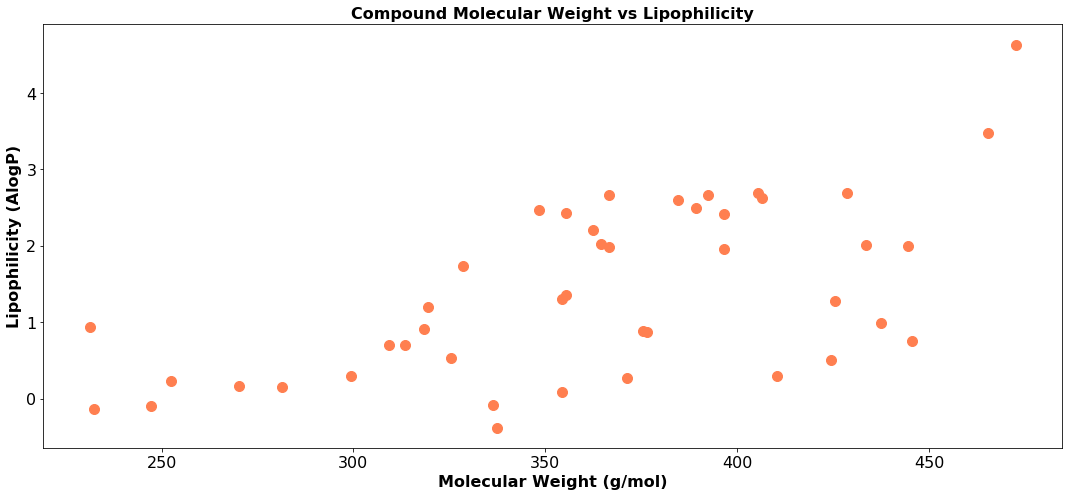

In [6]:
#plot without legend and with correct figure size and wanted colours
ax = df.plot(kind='scatter',x='Mw',y='AlogP',
              figsize=(15,7), color=['coral'], legend=False, s = 100);
ax.set_alpha(0.8)
#plot title, x, y
plt.title('Compound Molecular Weight vs Lipophilicity', weight = 'bold', fontsize=16)
#ticks
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
#labels
plt.xlabel('Molecular Weight (g/mol)', weight = 'bold', fontsize=16)
plt.ylabel('Lipophilicity (AlogP)', weight = 'bold', fontsize=16)
#fade background
ax.patch.set_facecolor('#FFFFFF')
#tight layout
plt.tight_layout()
plt.savefig('MwvsAlogP.png', dpi=300)
plt.show()


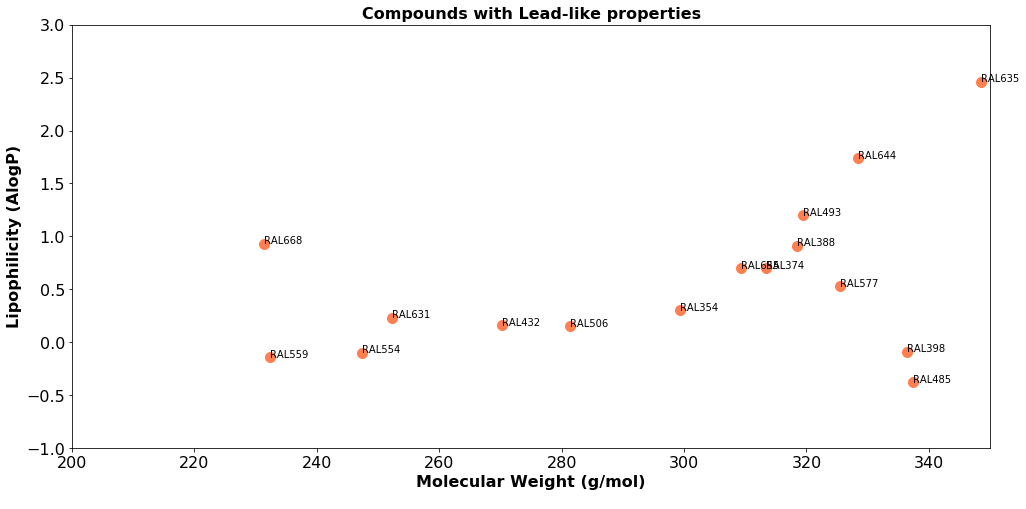

In [7]:
#plot lead-like compounds with supplier ID at each point                       
y = df['AlogP']
z = df['Mw']
n = df['Supplier ID']

#label points
fig, ax = plt.subplots()
ax.scatter(z, y, s = 100, color = 'coral')
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), rotation=0, fontsize=10)

#set figure size
fig.set_size_inches(14, 7)

#plot title, x, y
plt.title('Compounds with Lead-like properties', 
          weight = 'bold', fontsize=16)

#ticks
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
#labels
plt.xlabel('Molecular Weight (g/mol)', weight = 'bold', fontsize=16)
plt.ylabel('Lipophilicity (AlogP)', weight = 'bold', fontsize=16)
#limit
plt.ylim(-1, 3)
plt.xlim(200, 350)
#fade background
ax.patch.set_facecolor('#FFFFFF')
#tight layout
plt.tight_layout()
plt.savefig('Lead-like.png', dpi=300)
plt.show()

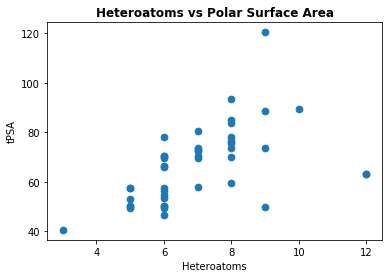

In [8]:
#creating a graph for all compounds relationship between hetroatoms and PSA
df.plot(kind='scatter',x='Heteroatoms',y='tPSA', s = 45) # scatter plot
plt.title('Heteroatoms vs Polar Surface Area', weight = 'bold')
plt.rcParams.update({'font.size': 14})
fig_size = plt.rcParams["figure.figsize"] #Get current size
fig_size[0] = 8                        #Set figure width to 12 and height to 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('HACvsHatom.png', dpi=300)
plt.show()

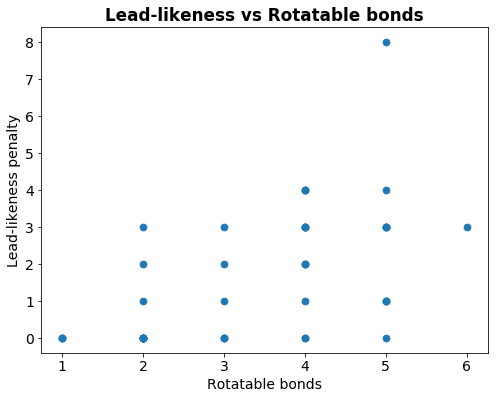

In [9]:
#creating a graph for all compounds relationship between hetroatoms and PSA
df.plot(kind='scatter',x='Rotatable bonds',y='Lead-likeness penalty', s = 45) # scatter plot
plt.title('Lead-likeness vs Rotatable bonds', weight = 'bold')
plt.rcParams.update({'font.size': 14})
fig_size = plt.rcParams["figure.figsize"] #Get current size
fig_size[0] = 8                        #Set figure width to 12 and height to 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('LeadVsRot.png', dpi=300)
plt.show()

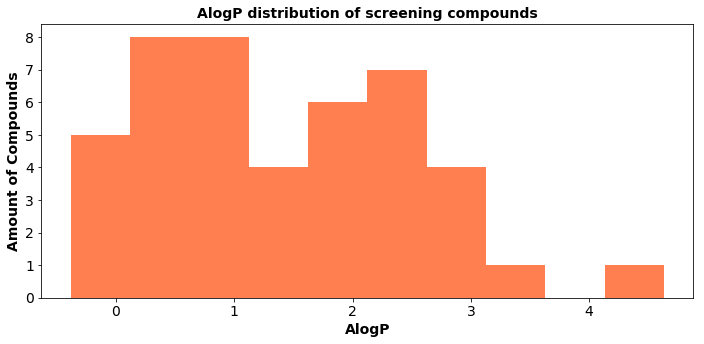

In [10]:
ax = df['AlogP'].plot(kind='hist', figsize=(10,5), color=['coral']);
ax.set_alpha(0.8)
#pd.DataFrame.hist(df[['AlogP']])
plt.xlabel('AlogP', weight = 'bold', fontsize=14)
plt.ylabel('Amount of Compounds', weight = 'bold', fontsize=14)
plt.title('AlogP distribution of screening compounds', weight = 'bold', fontsize=14)
#fade background
ax.patch.set_facecolor('#FFFFFF')
#tight layout
plt.tight_layout()
plt.savefig('AlogP.png', dpi=300)
plt.show()

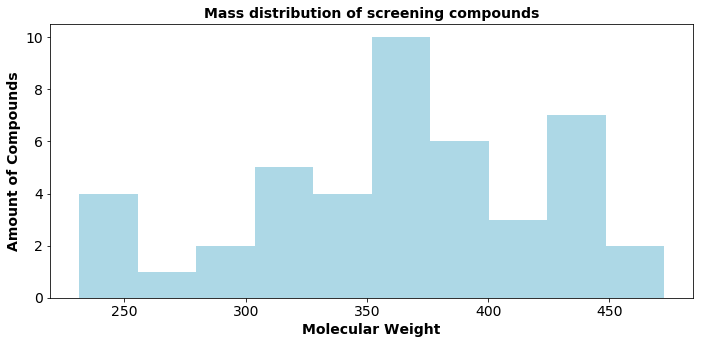

In [11]:
#pd.DataFrame.hist(df[['Mw']])
#plt.xlabel('Mw')
#plt.ylabel('Amount of Compounds')
#plt.title('Mass distribution of screening compounds')
#plt.show()

ax = df['Mw'].plot(kind='hist', figsize=(10,5), color=['lightblue']);
ax.set_alpha(0.8)
#pd.DataFrame.hist(df[['AlogP']])
plt.xlabel('Molecular Weight', weight = 'bold', fontsize=14)
plt.ylabel('Amount of Compounds', weight = 'bold', fontsize=14)
plt.title('Mass distribution of screening compounds', weight = 'bold', fontsize=14)
#fade background
ax.patch.set_facecolor('#FFFFFF')
#tight layout
plt.tight_layout()
plt.savefig('mass.png', dpi=300)
plt.show()

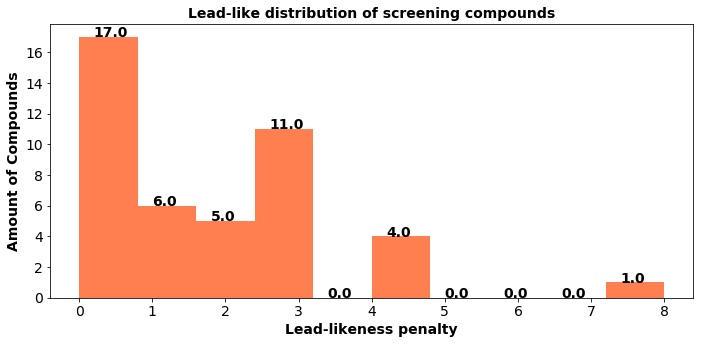

In [12]:
ax = df['Lead-likeness penalty'].plot(kind='hist', figsize=(10,5), color=['coral']);
ax.set_alpha(0.8)
#pd.DataFrame.hist(df[['AlogP']])
plt.xlabel('Lead-likeness penalty', weight = 'bold', fontsize=14)
plt.ylabel('Amount of Compounds', weight = 'bold', fontsize=14)
plt.title('Lead-like distribution of screening compounds', weight = 'bold', fontsize=14)



# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.2, i.get_height(), str(i.get_height()), fontsize=14, color='black', weight = 'bold')
#fade background
ax.patch.set_facecolor('#FFFFFF')
#tight layout
plt.tight_layout()
plt.show()

df = df.append({'Supplier ID':'1% ZINC database','Carbon sp3 fraction':'0.33'}, ignore_index=True)

df['Carbon sp3 fraction']=df['Carbon sp3 fraction'].astype(float)
df.tail()

# Principal Moment of Inertia Plot
The complexity of synthesising sp3 hybridised carbon centres has led to limited availability of complex chiral structures. As an illustration of the traditional focus on these molecules, one can examine their 3D structure by using a normalized principal moment of inertia (PMI) plot. A PMI plot was produced for a random 1% (90911 compounds) of compounds from the ZINC database, showing the molecular shape of the compounds. The ZINC database consists of commercially available compounds for virtual screening, where over 35 million compounds can be purchased. It provides evidence of the lack of 3D shape of available compounds, and thus giving an increase determination to produce molecular scaffolds with 3D shape and chirality.

<img src='pmi_zinc.png'>

### Now time to recreate the diagram using python
- More three-dimensional compounds typically have lower attrition rates in drug discovery, therefore it was necessary to assess the 52 compounds on their three-dimensionality. Each compound was plotted on a PMI plot using python. Evidence suggests the compounds are moving away from the heavily populated region and now venturing into the more unpopulated ‘sphere-like’ region of chemical space
- __2 methods__ are shown below in an attempt to recreate the diagram
- __1)__ Includes just an annotation box
- __2)__ Imports an jpg image in the corners of the vertices

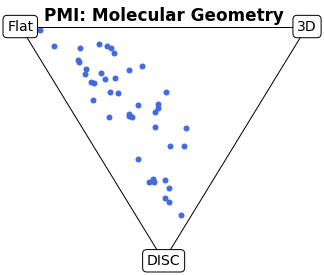

In [14]:
# PMI plot
f, ax1 = plt.subplots(1,1, figsize=(4.5,4))

#draw boxes in each corner
an1 = ax1.annotate("DISC", xy=(0.5, 0.5), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))
an1 = ax1.annotate("3D", xy=(1, 1), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))
an1 = ax1.annotate("Flat", xy=(0, 1), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))

#set limits
ax1.set_ylim(0.5,1)
ax1.set_xlim(0,1)
#set title
ax1.set_title('PMI: Molecular Geometry', weight = 'bold')
#set scatter plot
ax1.scatter(df['PMI x (I1)'], df['PMI y (I2)'], s=25, c='royalblue')
#draw triangle around plot
ax1.plot([0.5, 0], [0.5, 1], 'k-', lw=1)
ax1.plot([0.5, 1], [0.5, 1], 'k-', lw=1)
ax1.plot([1, 1], 'k-', lw=1)

ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])

# Hide "spines" on axis
ax1.set_axis_off()  
plt.tight_layout()
plt.savefig('PMI.png', dpi=300)
plt.show()

#### 2) PMI plot with JPEG images

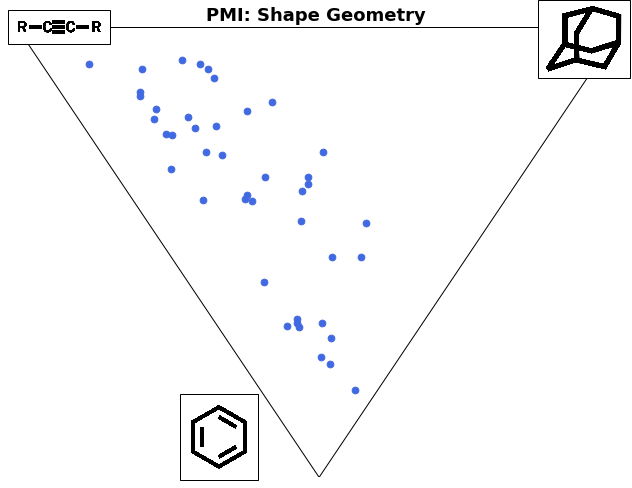

In [15]:

if 1:
    fig, ax1 = plt.subplots(1,1, figsize=(9,7))

    # Define a 1st position to annotate (display it with a marker)
    xy = (0.5, 0.7)
    #ax1.plot(xy[0], xy[1], ".r")
    ax1.scatter(df['PMI x (I1)'], df['PMI y (I2)'], s=45, c='royalblue')

    #add jpg image to top right corner of PMI plot
    offsetbox = TextArea("")
    arr_img = plt.imread('ada.jpg')
    imagebox = OffsetImage(arr_img, zoom=0.09)
    imagebox.image.axes = ax1
    ab = AnnotationBbox(imagebox, xy, xybox=(265, 258),xycoords='data',boxcoords="offset points")
    ax1.add_artist(ab)

    ## add disc image bottom middle 
    arr_img = plt.imread('disc.jpg')
    imagebox = OffsetImage(arr_img, zoom=0.1)
    imagebox.image.axes = ax1
    ab = AnnotationBbox(imagebox, xy, xybox=(-100., -140.), xycoords='data', boxcoords="offset points", pad=0.5)
    ax1.add_artist(ab)

    #add alkyne image to top left
    arr_img = plt.imread('alykne.jpg')
    imagebox = OffsetImage(arr_img, zoom=0.08)
    imagebox.image.axes = ax1
    ab = AnnotationBbox(imagebox, xy, xybox=(-260, 270), xycoords='data',boxcoords="offset points",pad=0.5)
    ax1.add_artist(ab)
        
    #draw triangle around plot
    ax1.plot([0.5, 0], [0.5, 1], 'k-', lw=1)
    ax1.plot([0.5, 1], [0.5, 1], 'k-', lw=1)
    ax1.plot([1, 1], 'k-', lw=1)
    
    # Fix the display limits to see everything
    ax1.set_title('PMI: Shape Geometry', weight = 'bold', fontsize = '18')
    ax1.set_ylim(0.5,1)
    ax1.set_xlim(-0.01,1)
    ax1.axes.get_xaxis().set_ticks([])
    ax1.axes.get_yaxis().set_ticks([])
    ax1.set_axis_off()  
    plt.tight_layout()
    plt.savefig('Large-PMI.png', dpi=300)
    plt.show()


# Fraction of sp3 hybridized carbons
There has now been increased interest in the degree of three-dimensional (3D) shape and aromatic character of the lead compound. Increasing the complexity of a drug candidate by varying its chirality and shape has a good correlation with the success of a compounds transition from discovery, through clinical testing, to market. Compared with unsaturated molecules, saturated molecules have been shown to have higher aqueous solubility and lower lipophilicity, both of which are important physical properties for success in the drug discovery setting.34 One way of assessing the complexity and saturation of a 3D molecule is to look at the fraction of sp3 hybridized carbons (Fsp3), with highly complex 3D molecules having a higher Fsp3 count; the Fsp3 count is calculated below (_Equation 1_).

#### _Equation 1_
<img src='fsp3_eqn.png'>

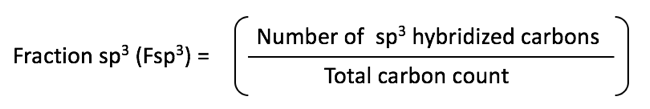

In [28]:
#Equation 1
Image(filename = 'fsp3_eqn.png')

Furthermore, studies have suggested that complex 3D shapes have desirable aqueous solubility because of increased solvation and poorer solid state crystal lattice packing. In addition, more than three aromatic rings in a molecule correlates with poorer developability and decreased aqueous solubility, therefore increasing the risk of attrition in early drug development.

Another objective of this project was to synthesise compounds that have a higher fraction of sp3 hybridised carbons. Each compound was again analysed using python and the Fsp3 value was calculated for the 52 screening compounds. A comparison to a random 1% of the ZINC database was shown, where it was clear the screening set experienced a higher Fsp3 nature. As seen from the graph only two compounds (4%) have a lower value than the ZINC database score, where the average value has increased by 70%. 

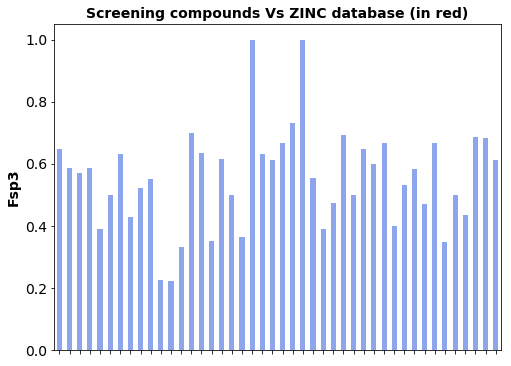

In [17]:
# bar chart with hidden axis and labelled specific value 
barlist = df.plot(kind='bar',x='Supplier ID',y='Carbon sp3 fraction', 
color=['#AA0000' if row['Carbon sp3 fraction'] == 0.33 else 'royalblue' for name,row in df.iterrows()], alpha=0.6, legend=False)

#plt.rcParams["figure.figsize"] = fig_size
plt.title('Screening compounds Vs ZINC database (in red)', weight = 'bold', size = 14)
                            
    # hide x axis #
plt.ylabel('Fsp3', weight = 'bold')
plt.xlabel('')
plt.xticks(visible=False)
plt.savefig('fsp3.png', dpi=300)
plt.show()

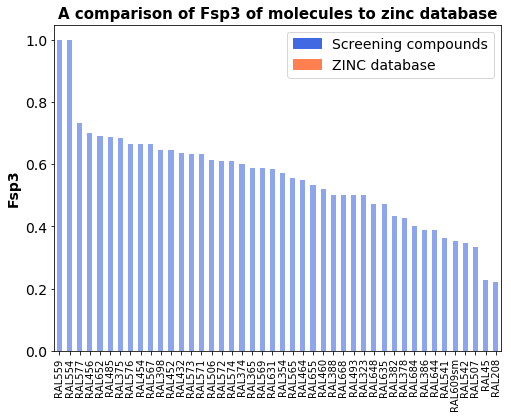

In [18]:
# plot with x axis labels and descending order values 
molecular_id = 'Supplier ID'
carbon_sp3 = 'Carbon sp3 fraction'
df_sorted = df.sort_values('Carbon sp3 fraction',ascending=False)
barlist = df_sorted.plot(kind='bar',x=molecular_id,y=carbon_sp3, 
color=['coral' if row['Carbon sp3 fraction'] == 0.33 else 'royalblue' for name,row in df_sorted.iterrows()], alpha=0.6)

#ticks and label
plt.xticks(fontsize = 10)
plt.title('A comparison of Fsp3 of molecules to zinc database', fontsize = '15', weight = 'bold')
plt.xlabel('')
plt.ylabel('Fsp3', weight = 'bold')

#sort legends 
b_label = mpatches.Patch(color='royalblue', 
                         label='Screening compounds')
r_label = mpatches.Patch(color='coral', 
                         label='ZINC database')
plt.legend(handles=[b_label,r_label])
plt.savefig('Fsp3Desc.png', dpi=300)
plt.show()

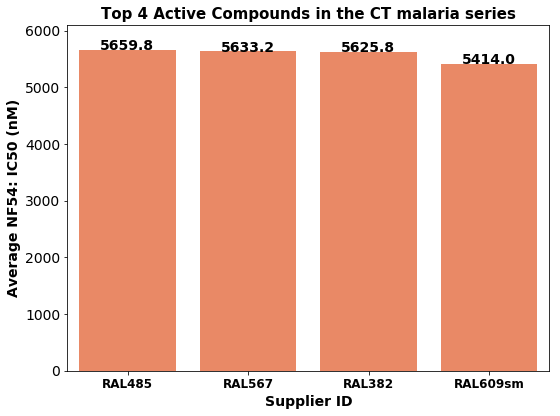

In [20]:
ActiveCompounds = df.nsmallest(4, 'Average NF54: IC50 (nM)').sort_values('Average NF54: IC50 (nM)', ascending=False)     
ax = sns.barplot(x="Supplier ID", y="Average NF54: IC50 (nM)", data=ActiveCompounds, color='coral')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.17, i.get_height()-6, str(i.get_height()), 
            fontsize=14, color='black', weight='bold')

#set ylabel bold
ax.set_ylabel('Average NF54: IC50 (nM)', weight='bold', 
              fontsize=14)
#settitle bold
ax.set_title('Top 4 Active Compounds in the CT malaria series', 
             weight='bold', fontsize=15)
plt.xlabel('Supplier ID', weight='bold', fontsize=14)
#changing fontsize for x labels
plt.xticks(fontsize=12, weight='bold')
#set background colour to white 
ax.patch.set_facecolor('#FFFFFF')
#neaten up layout
plt.tight_layout()
#change y limit
plt.ylim(0,6100) 
plt.savefig('active_compounds.png', dpi=300)
plt.show()

In [21]:
#change astype of both to float so can be in the correct format#change  
df['TO Displacement'] = df['TO Displacement'].str.replace('%','').astype(np.float64)
df['STDEV'] = df['STDEV'].str.replace('%','').astype(np.float64)

#fill na with 0
df['Purity (%) @LCMS'].fillna(0, inplace=True)

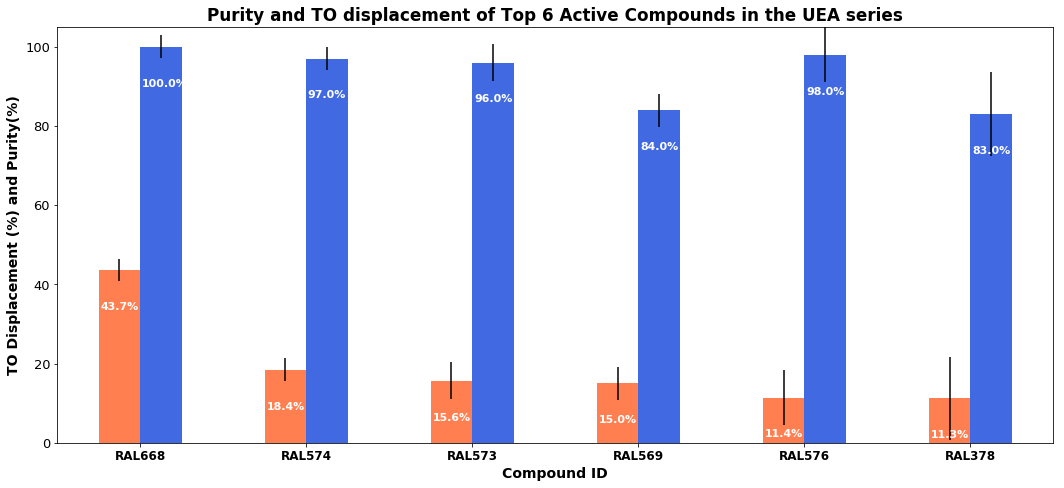

In [26]:
#Set index to X axis
UEA_results_index = df.set_index('Supplier ID')
#set to top 6 active compounds
ActiveCompounds_index = UEA_results_index.nlargest(6, 'TO Displacement').sort_values('TO Displacement',ascending=False)
#create new dataframe with the only desired columns
ActiveCompounds_index1 = ActiveCompounds_index[['TO Displacement', 'Purity (%) @LCMS']]

#plot without legend and with correct figure size and wanted colours
ax = ActiveCompounds_index1.plot(kind='bar',
              figsize=(15,7), color=['coral', 'royalblue'], fontsize=13, legend=False, yerr = ActiveCompounds_index['STDEV']);
ax.set_alpha(0.8)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.01, i.get_height()-10, \
            str(round((i.get_height()), 1)) + '%', fontsize=11, color='white',
                rotation=0, weight = 'bold')

#plot title, x, y
plt.title('Purity and TO displacement of Top 6 Active Compounds in the UEA series', weight = 'bold')
plt.xticks(rotation=0, fontsize=12, weight = 'bold')
plt.xlabel('Compound ID', weight = 'bold')
plt.ylabel('TO Displacement (%) and Purity(%)', weight = 'bold')
plt.ylim(0, 105)
#fade background
ax.patch.set_facecolor('#FFFFFF')
#tight layout
plt.tight_layout()
plt.savefig('uea_results.png', dpi=300)
plt.show()

In [23]:
# Imports for Reaction Enumeration
# Printing Results Inline
from __future__ import print_function

# RDKit Modules
from rdkit import rdBase
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import rdChemReactions
from rdkit.Chem import FunctionalGroups
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

# Handling tuples for reaction enumeration
from itertools import chain

In [24]:
#print SMILES strings for the 4 active compounds 
ActiveCompounds = df.nsmallest(4, 'Average NF54: IC50 (nM)').sort_values('Average NF54: IC50 (nM)',ascending=False)
ActiveCompounds = ActiveCompounds['SMILES']
ActiveCompounds.head()

41                OC1[C@@H]2C[C@@H](S(=O)(C)=O)[C@@H](N2C)[C@@H]3[C@H]1CN(C4=NC=CC=C4)C3
32             CN(CC1=CC=C(OC(F)(F)F)C=C1)[C@H]2[C@@H]3C[C@@H](S(=O)(C)=O)[C@@H](N3C)CC2
40    FC(C=C1)=CC=C1[C@@H]2[C@H](N3C)[C@H](S(=O)(C)=O)C[C@H]3[C@H](OCC4=CC=C(C#N)C=C4)C2
15                   O=C(C1=NNC(C(O)=O)=C1[C@@H]2N3CC4=CC=CC=C4)[C@@H]3C[C@H]2S(=O)(C)=O
Name: SMILES, dtype: object

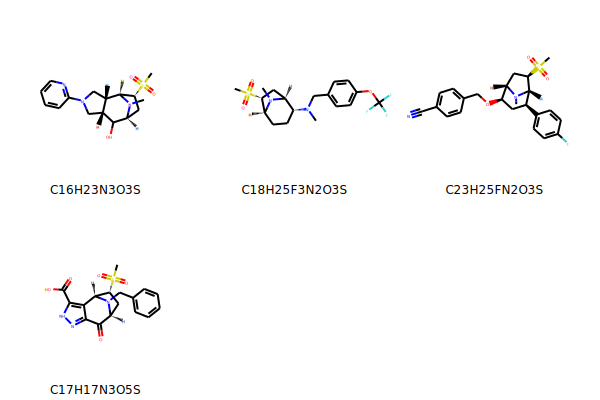

In [25]:
#find the active compounds
ActiveCompounds = df.nsmallest(4, 'Average NF54: IC50 (nM)').sort_values('Average NF54: IC50 (nM)',ascending=False)
ActiveCompounds = ActiveCompounds['SMILES']
# use rdkit to show active compounds
ActiveCompounds = [Chem.MolFromSmiles(mol) for mol in ActiveCompounds]
formulae_1 = [rdMolDescriptors.CalcMolFormula(mol) for mol in ActiveCompounds]
Draw.MolsToGridImage(ActiveCompounds, legends = formulae_1)